# Tutorial 2

## Density Analysis

Understanding the particle density of a material is incredibly useful when studying things like defect segregation and atomic structure. Consider a system with a grain boundary, it may be interesting to know the structure changes at the boundary, e.g is there an increase or decrease in the amount of a certain species at the grain boundary and does this inform you about aby segregation behaviour? Another example involves a surface with a layer of water

The density module of polypy allows the particle density to be evaluated in one and two dimensions, this can then be converted into a charge density and (in one dimension) the electric field and electrostatic potential. 

In [1]:
from polypy import read as rd
from polypy import density as Dens
from polypy import utils as ut
from polypy import write as wr
import numpy as np

The first step is to read the data. We want the data for both species so need to provide a list of the species.

```
["CA", "F"]
```

In [2]:
data = rd.read_history("../example_data/HISTORY", ["CA", "F"])

The next step is to create the density object for both species.

In [3]:
ca_density = Dens.Density(data, atom_type="CA")
f_density = Dens.Density(data, atom_type="F")

### Calculating the total number of species within a region

The first feature of the density class is the one_dimensional_density_sb function, which calculates the total number of atoms between an upper and lower coordinate value e.g. the top and bottom coordinates of a slab, or edges of a grain boundary. 

In [4]:
plane = ca_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of Ca Between -5.0 - 5.0   :", plane, " across ", data['timesteps'], "timesteps")
print("Average Number of Ca Between -5.0 - 5.0 :", plane / data['timesteps'])

plane = f_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of F Between -5.0 - 5.0   :", plane, " across ", data['timesteps'], "timesteps")
print("Average Number of F Between -5.0 - 5.0 :", plane / data['timesteps'])

Total Number of Ca Between -5.0 - 5.0   : 77999  across  500 timesteps
Average Number of Ca Between -5.0 - 5.0 : 155.998
Total Number of F Between -5.0 - 5.0   : 190004  across  500 timesteps
Average Number of F Between -5.0 - 5.0 : 380.008


## One Dimension

### Particle Density

The one_dimensional_density function will take a bin size e.g. 0.1 $AA$ and a direction e.g. the first lattice vector and calculate the total number of a species in 0.1 $AA$ bins in the first lattice vector.

The function will return the positions of the bins and the total number of species. These can then be plotted with the one_dimensional_plot function which takes a list of x values, a list of y values and a list of labels. 

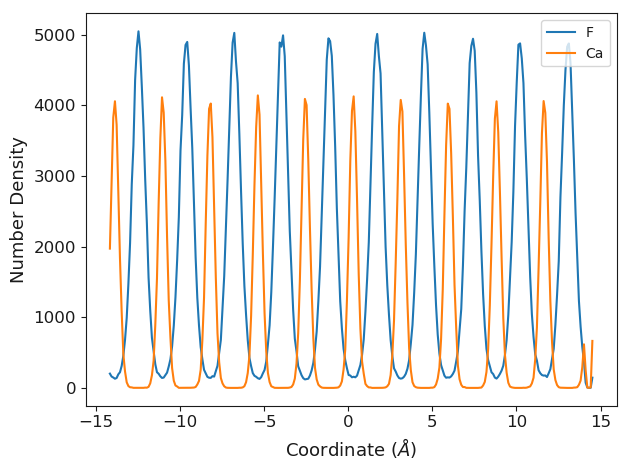

In [5]:
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="x")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="x")

wr.one_dimensional_density_plot([fx, cx], [fy, cy], ["F", "Ca"])

### Charge Density

The particle densities can be combined with the particle charges to generate the one dimensional charge density according to 

\begin{align}
\rho_q(z) = \sum_{i} q_i \rho_i(z)
\end{align}

where $\rho_{i}$ is the density of atom i and $q_{i}$ is its charge.  

The one_dimensional_charge_density function requires a list of particle densities, list of charges and the bin volume. 

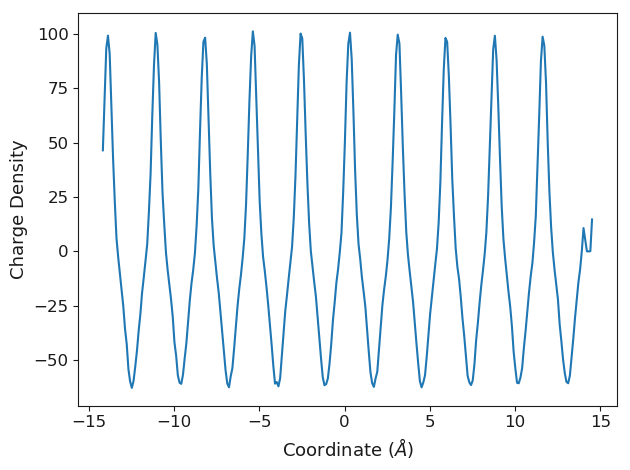

In [6]:
bin_volume = 0.1 * np.mean(data['lv'][:,1] * np.mean(data['lv'][:,2]))

charge_density = ut.one_dimensional_charge_density([fy, cy], [-1.0, 2.0], bin_volume)

wr.one_dimensional_charge_density_plot(fx, charge_density)

### Electric Field and Electrostatic Potential

The charge density can be converted into the electric field and the electrostatic potential.

\begin{align}
E(z) = \frac{1}{- \epsilon_{0}} \int_{z_{0}}^{z} \rho_{q}(z')dz'
\end{align}


\begin{align}
\Delta_{\psi}(z) = \int_{z_{0}}^{z} E(z')dz'
\end{align}

The poisson solver function will take the bin positions, and the charge density and return the electric field and the electrostatic potential. 

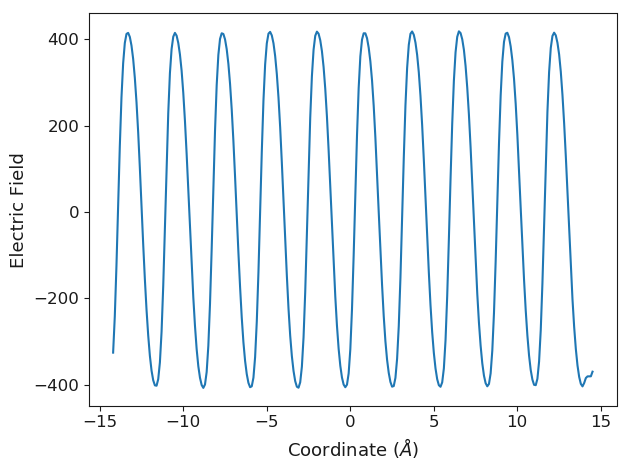

In [7]:
dx, e_field, potential = ut.poisson_solver(fx, charge_density, data['timesteps'])
wr.electric_field_plot(dx, e_field)

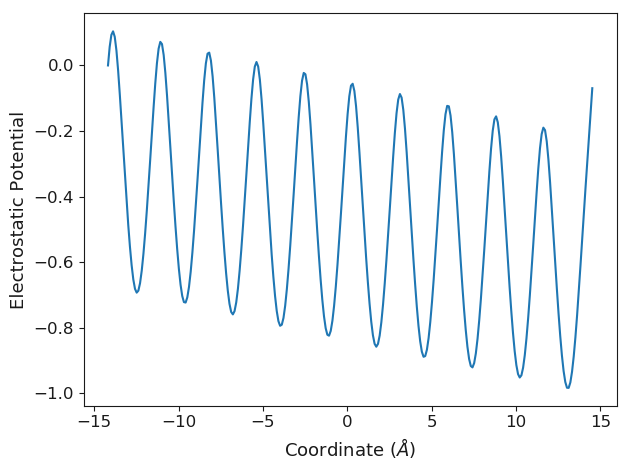

In [8]:
wr.electrostatic_potential_plot(dx, potential)

## Two Dimensions

### Particle Density

The particle density can be evaluated in two dimensions. The two_dimensional_density function will calculate the total number of species in cuboids. The coordinates in x and y of the box are returned and a grid of species counts are returned. 

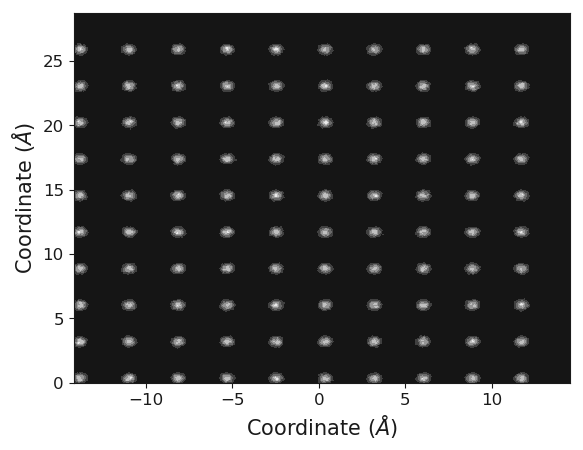

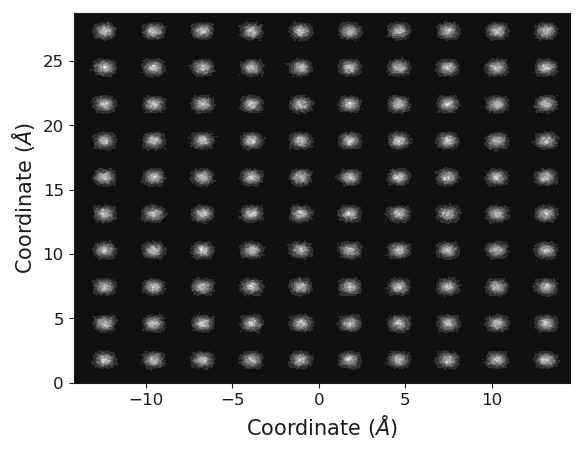

In [9]:
cx, cy, cz = ca_density.two_dimensional_density(box=0.1, direction="x")
fx, fy, fz = f_density.two_dimensional_density(box=0.1, direction="x")

wr.two_dimensional_density_plot(cx, cy, cz)
wr.two_dimensional_density_plot(fx, fy, fz)

### Charge Density

In the same fashion as the one dimensional case, the charge density can be evaluated in two dimensions using the two_dimensional_charge_density function. 

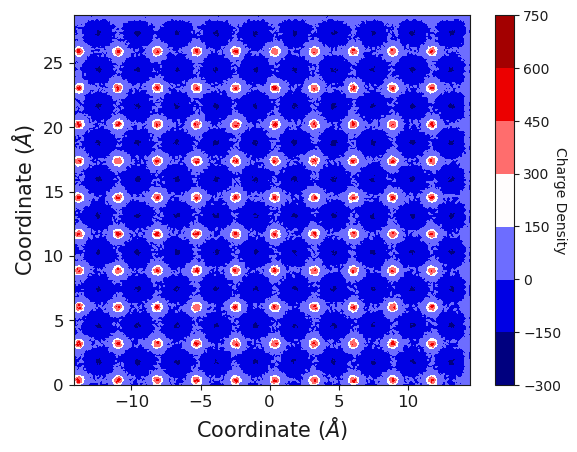

In [10]:
box_volume = 0.1 * 0.1 * np.mean(data['lv'][:,0])

charge_density = ut.two_dimensional_charge_density([fz, cz], [-1.0, 2.0], box_volume)
wr.two_dimensional_charge_density_plot(fx, fy, charge_density)

## One and Two Dimensions

Finally, the contour plots can give a good understanding of the average positions of the atoms (or the location of the lattice sites) however it does not give a good representation of how many species are actually there. The one_and_two_dimensional_overlay function will evaluate the particle dnesity in one and two dimensions and then overlay the two on to a single plot, allowing both the lattice sites, and total density to be viewed. 

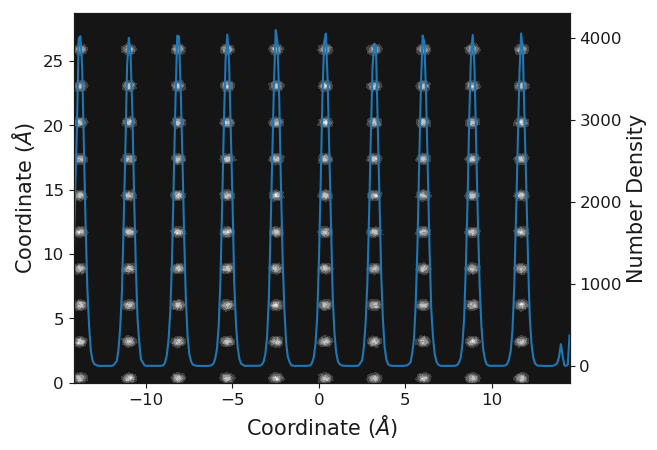

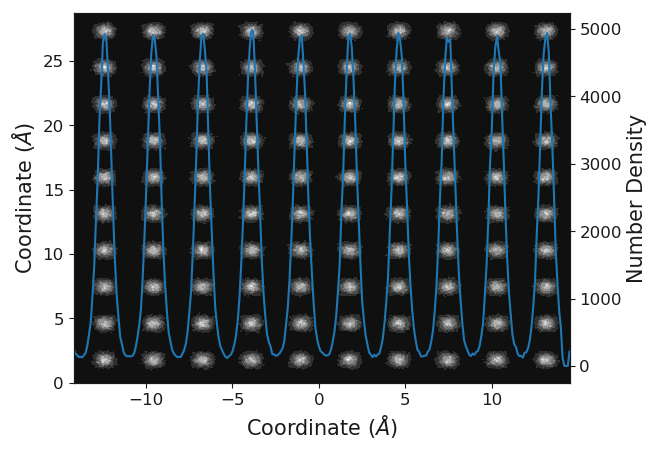

In [11]:
cx, cy, cz, cy2 = ca_density.one_and_two_dimension_overlay(box=0.1)
fx, fy, fz, fy2 = f_density.one_and_two_dimension_overlay(box=0.1)

wr.combined_density_plot(cx, cy, cz, cy2)
wr.combined_density_plot(fx, fy, fz, fy2)